<a href="https://colab.research.google.com/github/davidemusi/BLOG-PROJECT/blob/main/Mini_Project_Perform_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
print(data.head())


       TV      Radio  Social Media Influencer       Sales
0     Low   3.518070      2.293790      Micro   55.261284
1     Low   7.756876      2.572287       Mega   67.574904
2    High  20.348988      1.227180      Micro  272.250108
3  Medium  20.108487      2.728374       Mega  195.102176
4    High  31.653200      7.776978       Nano  273.960377


In [2]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


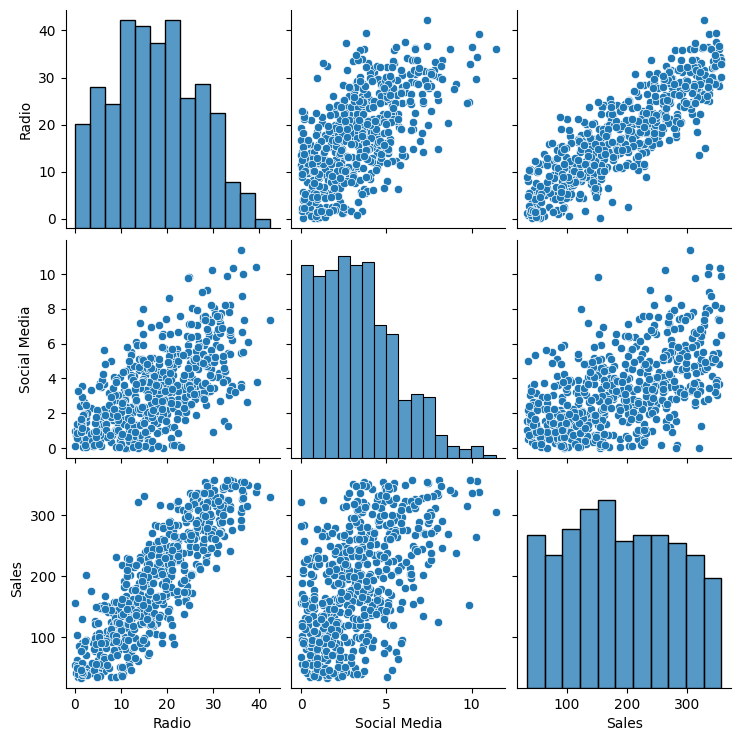

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of the continuous variables
sns.pairplot(df.select_dtypes(include=['number']))  # Selecting only numerical columns

# Show the plot
plt.show()

In [4]:
# Drop rows with missing values
df = df.dropna()

# Encode categorical variables (if needed)
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding

# Display the first few rows to verify changes
print(df.head())

       Radio  Social Media       Sales  TV_Low  TV_Medium  Influencer_Mega  \
0   3.518070      2.293790   55.261284    True      False            False   
1   7.756876      2.572287   67.574904    True      False             True   
2  20.348988      1.227180  272.250108   False      False            False   
3  20.108487      2.728374  195.102176   False       True             True   
4  31.653200      7.776978  273.960377   False      False            False   

   Influencer_Micro  Influencer_Nano  
0              True            False  
1             False            False  
2              True            False  
3             False            False  
4             False             True  


In [8]:
import statsmodels.formula.api as smf

# Rename column to remove spaces
df.rename(columns={'Social Media': 'Social_Media'}, inplace=True)

# Define the OLS formula
formula = 'Sales ~ Radio + Social_Media + TV_Low + TV_Medium + Influencer_Mega + Influencer_Micro + Influencer_Nano'

# Fit the model
model = smf.ols(formula=formula, data=df).fit()

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        17:31:01   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

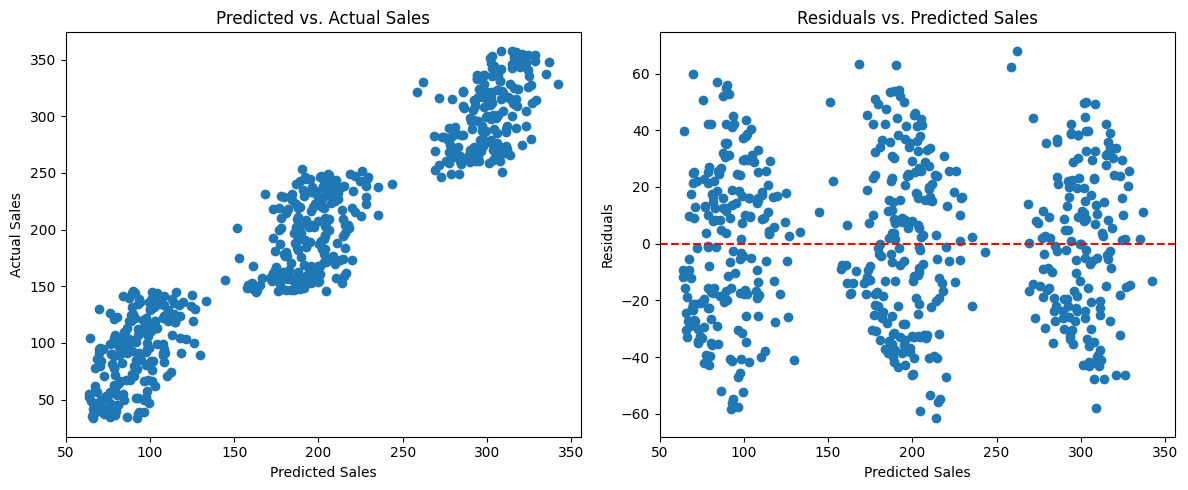

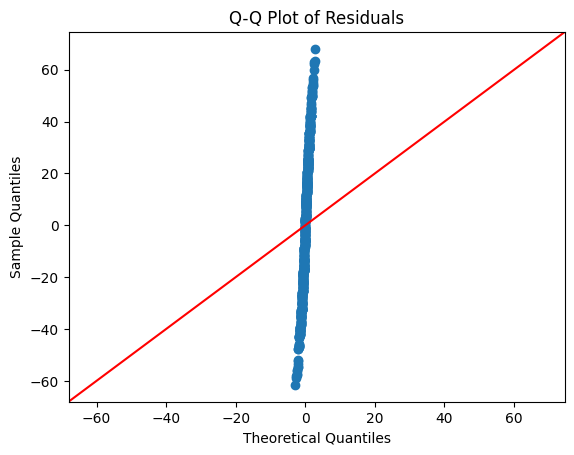

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot of predicted values vs. actual Sales
axs[0].scatter(model.fittedvalues, df['Sales'])
axs[0].set_xlabel("Predicted Sales")
axs[0].set_ylabel("Actual Sales")
axs[0].set_title("Predicted vs. Actual Sales")

# Scatter plot of residuals vs. predicted values
axs[1].scatter(model.fittedvalues, model.resid)
axs[1].axhline(y=0, color='r', linestyle='--')
axs[1].set_xlabel("Predicted Sales")
axs[1].set_ylabel("Residuals")
axs[1].set_title("Residuals vs. Predicted Sales")

plt.tight_layout()
plt.show()

# Calculate residuals and create a Q-Q plot
sm.qqplot(model.resid, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()


In [10]:
# Display the model summary
print(model.summary())

# Interpret the coefficients
coefficients = model.params
print("\nModel Coefficients:")
print(coefficients)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        17:34:28   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               